In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [174]:
dataset=pd.read_csv("hotel_bookings.csv")
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [175]:
dataset.shape

(119390, 32)

In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [177]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Exploratory Data Analysis

# Missing Features

In [178]:
nan_feature=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
nan_feature

['children', 'country', 'agent', 'company']

In [179]:
dataset[nan_feature].head()

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN


0    119386
1         4
Name: children, dtype: int64


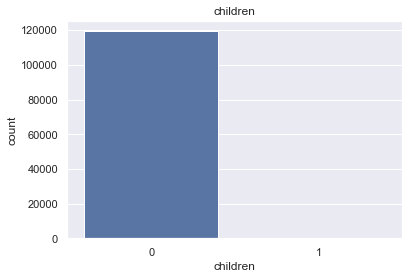

0    118902
1       488
Name: country, dtype: int64


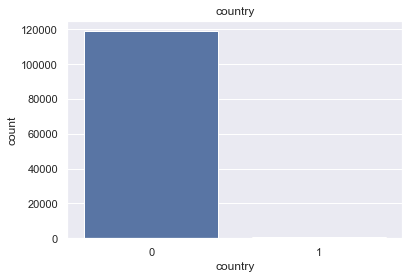

0    103050
1     16340
Name: agent, dtype: int64


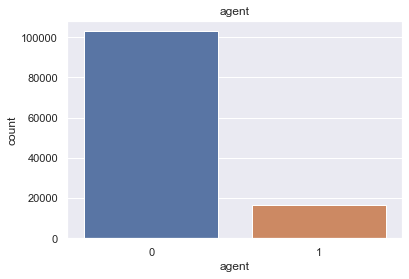

1    112593
0      6797
Name: company, dtype: int64


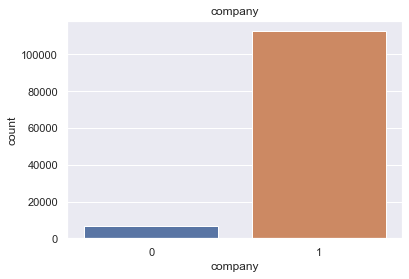

In [180]:
sns.set(style='darkgrid')
data=dataset.copy()
for feature in nan_feature:
    data[feature]=np.where(data[feature].isnull(),1,0)
    print(data[feature].value_counts())
    plt.title(feature)
    sns.countplot(data[feature])
    plt.show()

so here company column is 94% missing values so we will drop this column

# categorical features 

In [181]:
cat_feature=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
cat_feature

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [182]:
for feature in cat_feature:
    print(feature, len(dataset[feature].unique()))

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3
reservation_status_date 926


In [183]:
dataset['reservation_status_date'].head()

0    2015-07-01
1    2015-07-01
2    2015-07-02
3    2015-07-02
4    2015-07-03
Name: reservation_status_date, dtype: object

# Numerical Feature

In [184]:
num_feature=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
num_feature

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [185]:
cont_num_feature=[feature for feature in num_feature if len(dataset[feature].unique()) > 25]
for feature in cont_num_feature:
    print(feature,len(dataset[feature].unique()))

lead_time 479
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_week_nights 35
previous_bookings_not_canceled 73
agent 334
company 353
days_in_waiting_list 128
adr 8879


In [186]:
disc_num_feature=[feature for feature in num_feature if len(dataset[feature].unique()) < 25]
for feature in disc_num_feature:
    print(feature,len(dataset[feature].unique()))

is_canceled 2
arrival_date_year 3
stays_in_weekend_nights 17
adults 14
children 6
babies 5
is_repeated_guest 2
previous_cancellations 15
booking_changes 21
required_car_parking_spaces 5
total_of_special_requests 6


In [187]:
dataset[cont_num_feature].head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,NaN,NaN,0,0.0
1,737,27,1,0,0,NaN,NaN,0,0.0
2,7,27,1,1,0,NaN,NaN,0,75.0
3,13,27,1,1,0,304.0,NaN,0,75.0
4,14,27,1,2,0,240.0,NaN,0,98.0


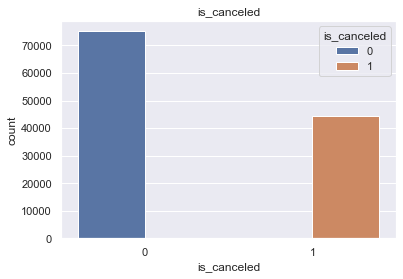

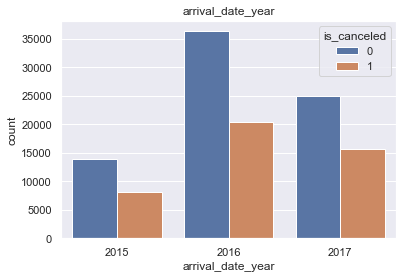

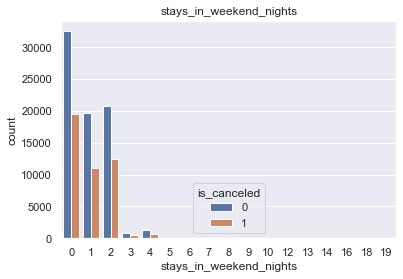

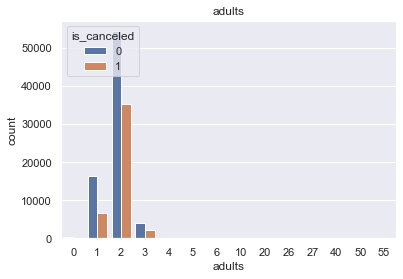

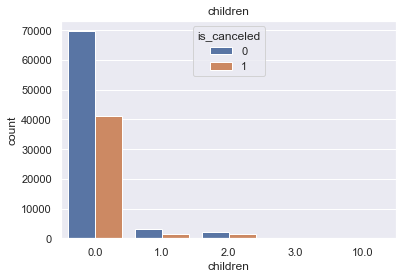

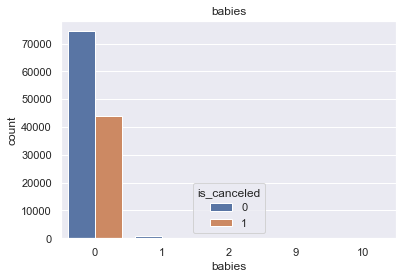

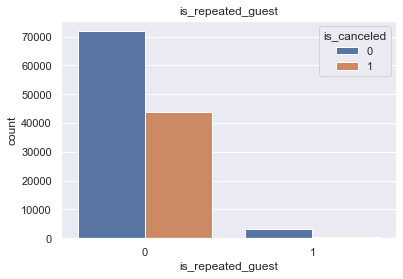

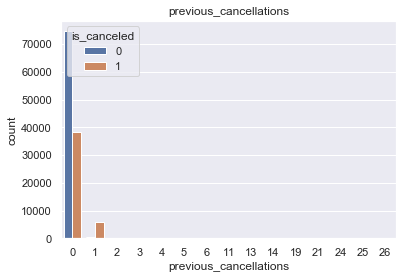

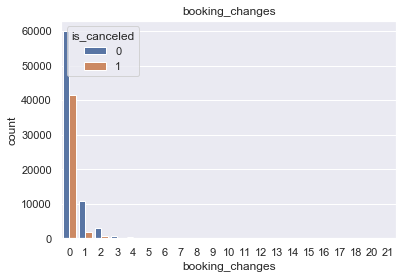

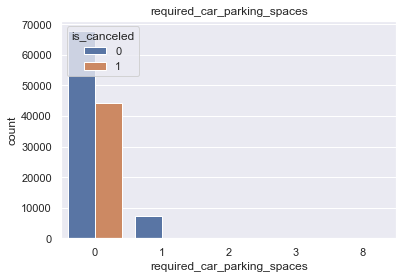

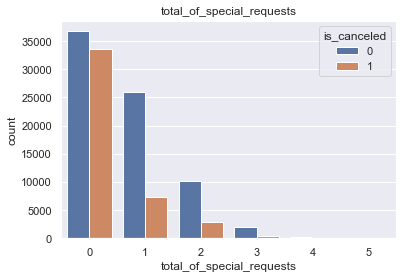

In [189]:
for feature in disc_num_feature:
    sns.countplot(dataset[feature],hue=dataset['is_canceled'])
    plt.title(feature)
    plt.show()

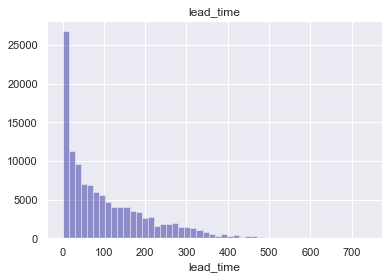

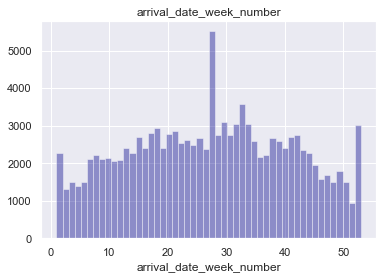

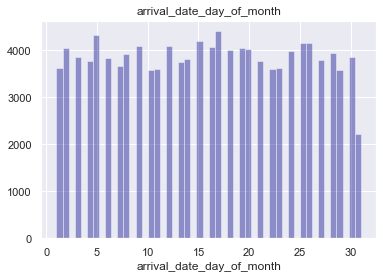

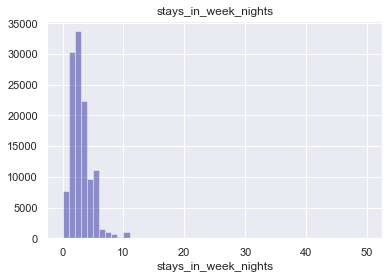

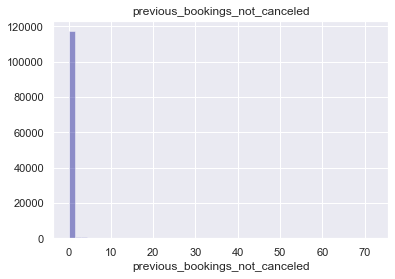

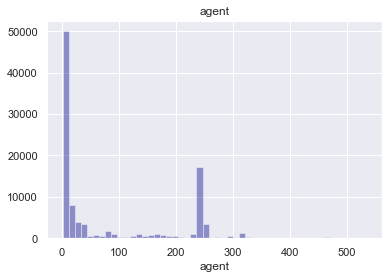

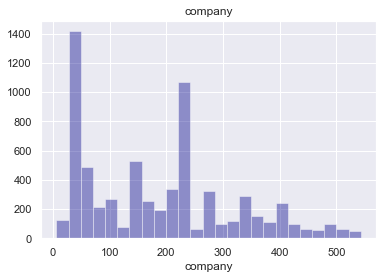

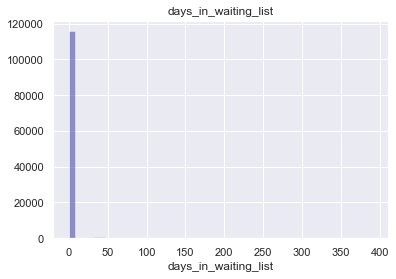

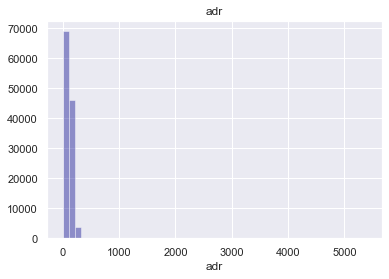

In [190]:
for feature in cont_num_feature:
    sns.distplot(dataset[feature],kde=False,color='darkblue')
    plt.title(feature)
    plt.show()

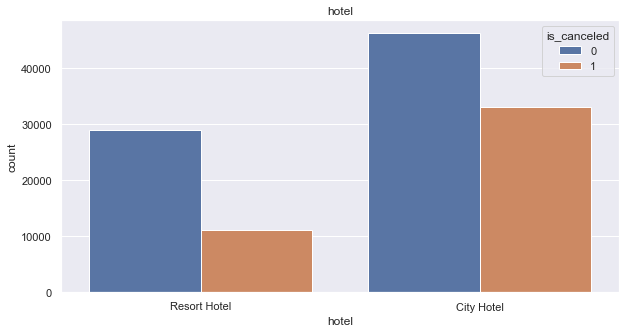

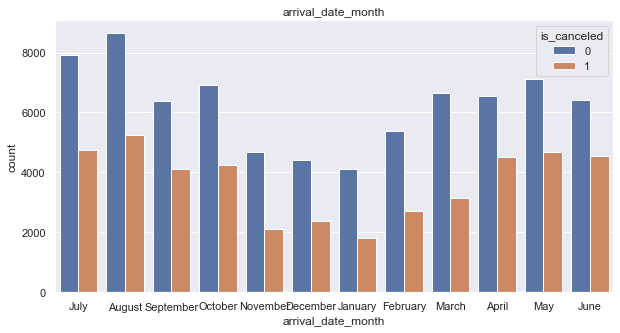

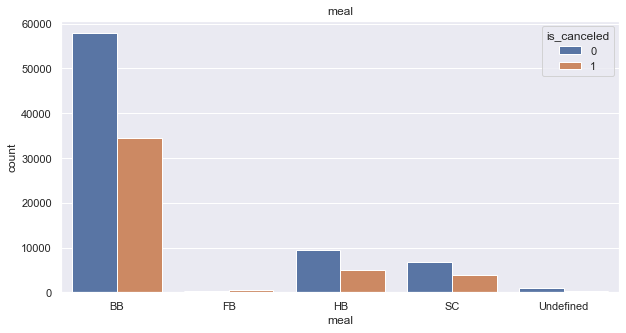

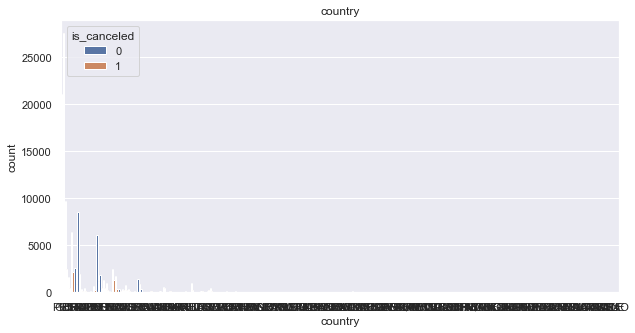

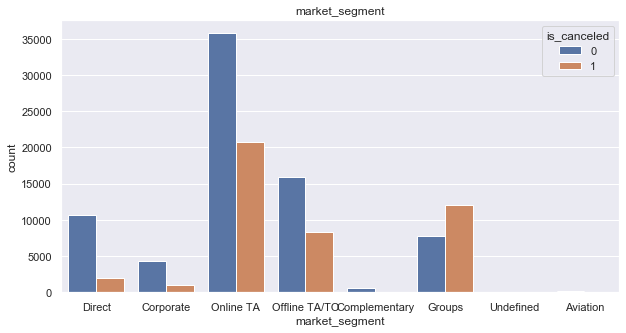

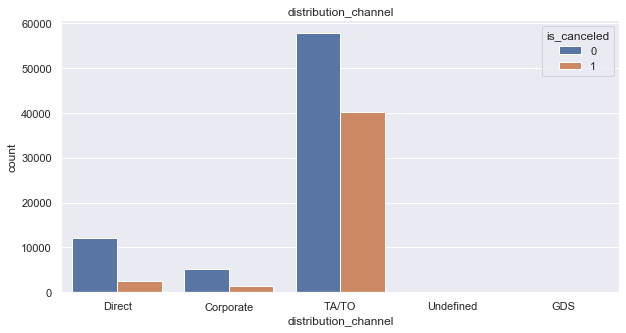

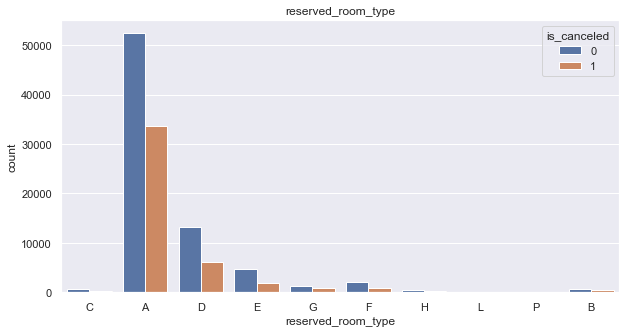

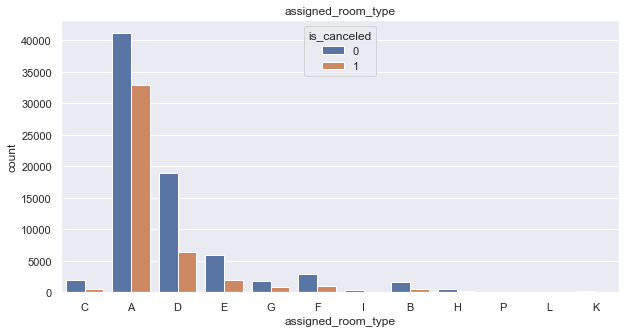

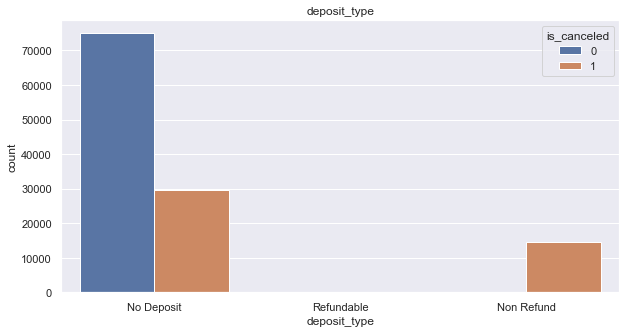

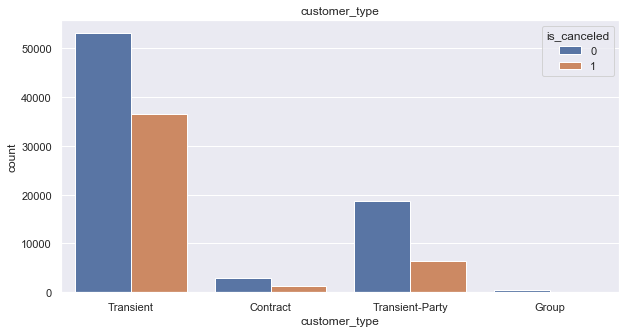

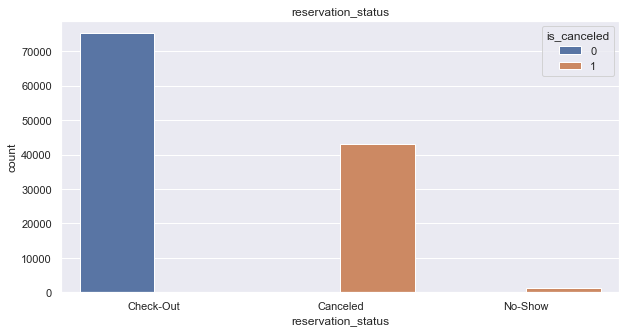

KeyError: 'reservation_status_date'

<Figure size 720x360 with 0 Axes>

In [191]:
cat_feature=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
dataset.drop('reservation_status_date',axis=1,inplace=True)
for feature in cat_feature:
    plt.figure(figsize=(10,5))
    sns.countplot(dataset[feature],hue=dataset['is_canceled'])
    plt.title(feature)
    plt.show()

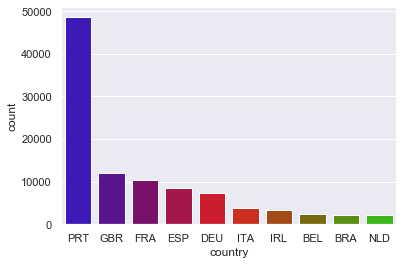

In [192]:
sns.countplot(x='country', data=dataset, 
              order=pd.value_counts(dataset['country']).iloc[:10].index,palette="brg")

# outliers

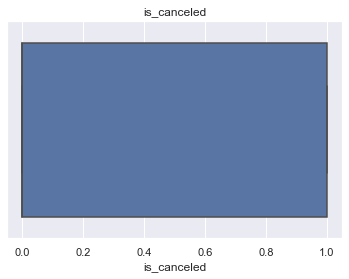

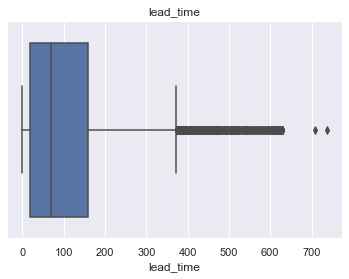

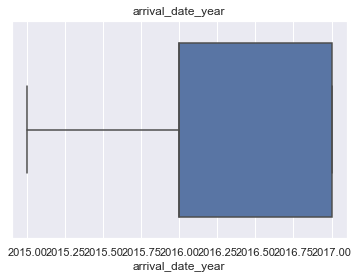

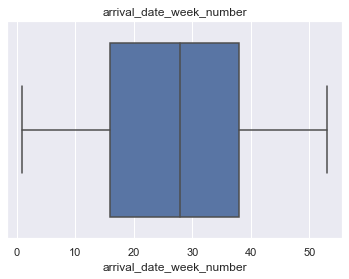

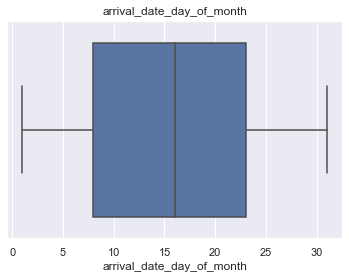

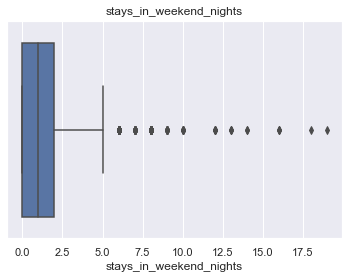

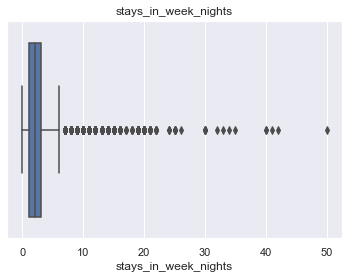

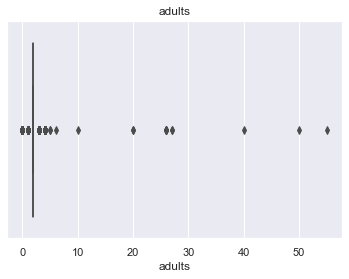

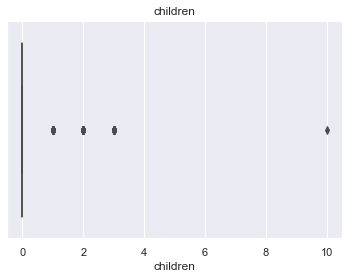

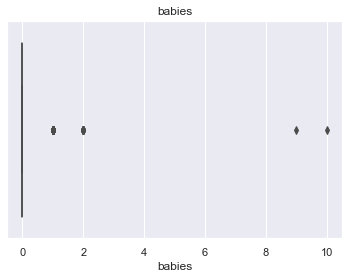

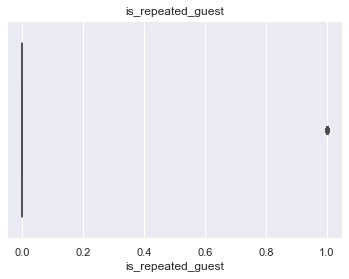

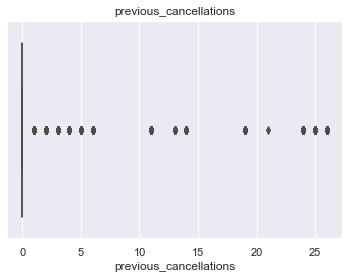

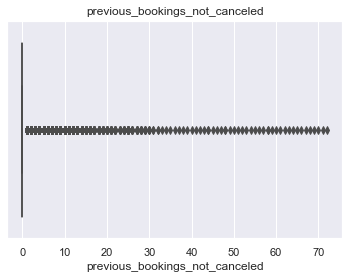

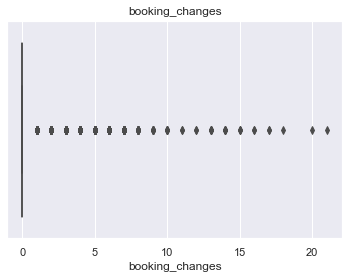

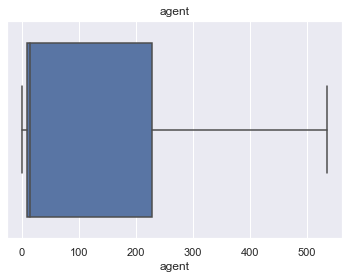

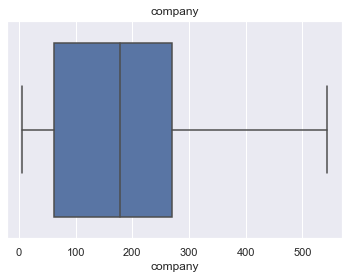

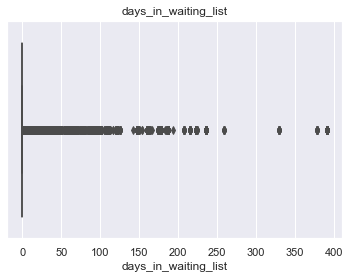

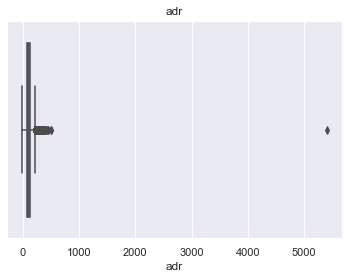

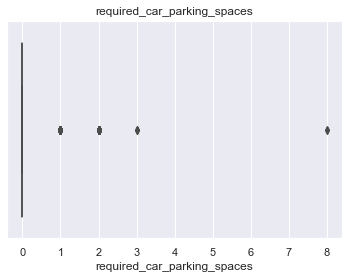

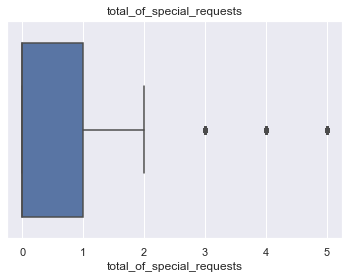

In [193]:
for feature in num_feature:
    sns.boxplot(dataset[feature])
    plt.title(feature)
    plt.show()

# correlation

In [194]:
cor=dataset.corr()

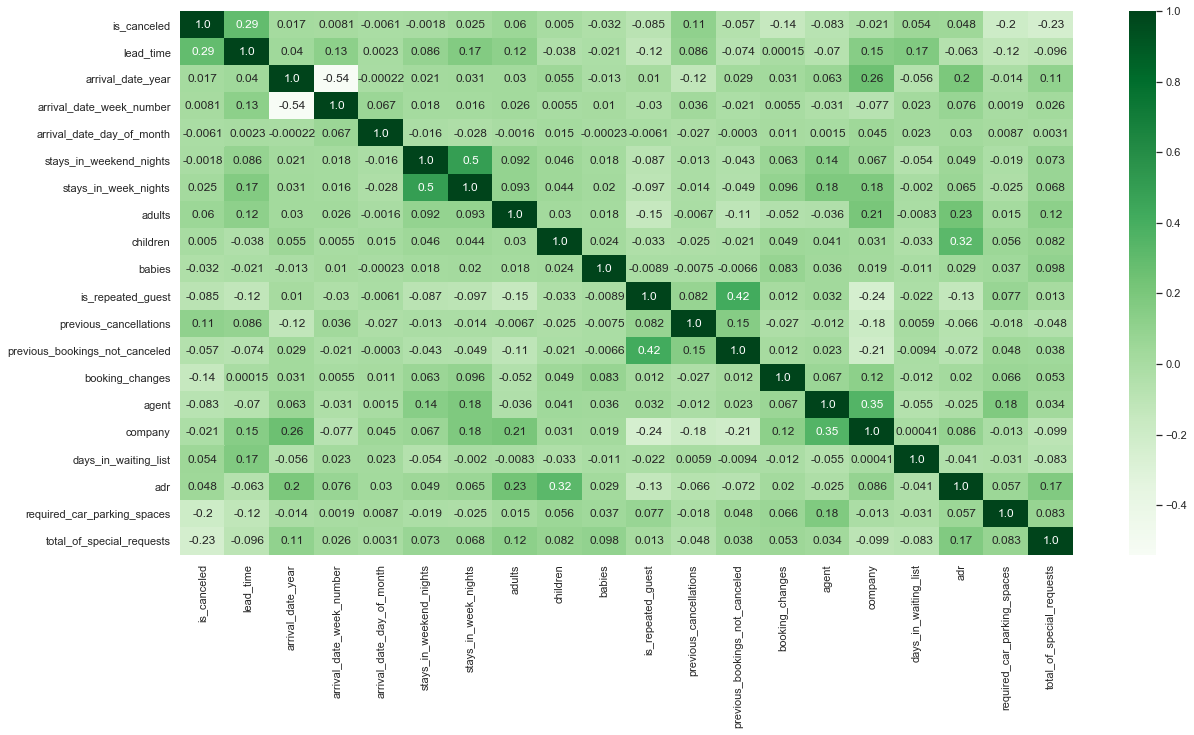

In [308]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='Greens',fmt='.2')

# Feature Engineering

In [197]:
# separating the dependent and independent variables
y=dataset['is_canceled']

In [198]:
X=pd.concat([dataset['hotel'],dataset.iloc[:,2:]],axis=1)

In [199]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out


In [200]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [201]:
#splitting the train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [202]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(83573, 30)
(35817, 30)
(83573,)
(35817,)


# Handling Missing values

In [203]:
x_train.drop('company',axis=1,inplace=True)

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [204]:
nan_feature=[feature for feature in x_train.columns if x_train[feature].isnull().sum()>1]
nan_feature

['children', 'country', 'agent']

In [205]:
x_train['country']=x_train['country'].replace(np.nan,'unknown')

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [206]:
nan_feature=[feature for feature in x_train.columns if x_train[feature].isnull().sum()>1]
nan_feature

['children', 'agent']

In [207]:
x_train['children']=x_train['children'].replace(np.nan,x_train['children'].median())

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
nan_feature=[feature for feature in x_train.columns if x_train[feature].isnull().sum()>1]
nan_feature

['agent']

In [209]:
x_train['agent']=x_train['agent'].replace(np.nan,x_train['agent'].median())

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
nan_feature=[feature for feature in x_train.columns if x_train[feature].isnull().sum()>1]
nan_feature

[]

# Handling Categorical Feature

In [211]:
map_func={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [212]:
x_train['arrival_date_month']=x_train['arrival_date_month'].map(map_func)

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [213]:
cat_feature

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [215]:
# doing one hot encoding for nominal categoeical features
hotel_df=pd.get_dummies(x_train['hotel'])
meal_df=pd.get_dummies(x_train['meal'],drop_first=True)
market_df=pd.get_dummies(x_train['market_segment'],drop_first=True)
dist_df=pd.get_dummies(x_train['distribution_channel'],drop_first=True)
deposit_df=pd.get_dummies(x_train['deposit_type'],drop_first=True)
cust_df=pd.get_dummies(x_train['customer_type'],drop_first=True)
print(hotel_df.shape,meal_df.shape,market_df.shape,dist_df.shape,deposit_df.shape,cust_df.shape)

(83573, 2) (83573, 4) (83573, 7) (83573, 4) (83573, 2) (83573, 3)


In [216]:
ohe=pd.concat([hotel_df,meal_df,market_df,dist_df,deposit_df,cust_df],axis=1)

In [217]:
ohe.shape

(83573, 22)

In [218]:
ohe.head()

,City Hotel,Resort Hotel,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
9710,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
40307,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
110051,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
22999,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8344,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [219]:
cat_feature=[feature for feature in x_train.columns if x_train[feature].dtypes == 'O']
cat_feature

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [220]:
# dropping the unnecessary features
x_train.drop(['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status'],axis=1,inplace=True)

In [221]:
x_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
9710,122,2016,12,53,27,0,4,2,0.0,0,FRA,0,0,0,3,240.0,0,74.75,0,2
40307,20,2015,7,30,22,0,2,2,0.0,0,PRT,0,0,0,0,1.0,0,62.00,0,0
110051,87,2017,4,16,16,2,3,3,0.0,0,BEL,0,0,0,0,9.0,0,171.00,0,0
22999,0,2017,2,5,2,0,1,1,0.0,0,PRT,1,0,1,0,196.0,0,43.00,0,1
8344,42,2016,9,39,23,0,1,2,0.0,0,IRL,0,0,0,0,240.0,0,109.00,0,1


In [222]:
x_train.shape

(83573, 20)

In [223]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [224]:
#doing label encoding of country feature
lble=le.fit_transform(x_train['country'])
lble

array([ 54, 128,  14, ...,  78, 128, 128])

In [225]:
x_train['country']=lble

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
x_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
9710,122,2016,12,53,27,0,4,2,0.0,0,54,0,0,0,3,240.0,0,74.75,0,2
40307,20,2015,7,30,22,0,2,2,0.0,0,128,0,0,0,0,1.0,0,62.00,0,0
110051,87,2017,4,16,16,2,3,3,0.0,0,14,0,0,0,0,9.0,0,171.00,0,0
22999,0,2017,2,5,2,0,1,1,0.0,0,128,1,0,1,0,196.0,0,43.00,0,1
8344,42,2016,9,39,23,0,1,2,0.0,0,73,0,0,0,0,240.0,0,109.00,0,1


In [231]:
#checking that any null feature left
ohe.isnull().sum()

City Hotel         0
Resort Hotel       0
FB                 0
HB                 0
SC                 0
Undefined          0
Complementary      0
Corporate          0
Direct             0
Groups             0
Offline TA/TO      0
Online TA          0
Undefined          0
Direct             0
GDS                0
TA/TO              0
Undefined          0
Non Refund         0
Refundable         0
Group              0
Transient          0
Transient-Party    0
dtype: int64

In [232]:
ohe.head()

,City Hotel,Resort Hotel,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
9710,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
40307,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
110051,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
22999,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8344,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [233]:
ohe.shape

(83573, 22)

In [234]:
x_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
9710,122,2016,12,53,27,0,4,2,0.0,0,54,0,0,0,3,240.0,0,74.75,0,2
40307,20,2015,7,30,22,0,2,2,0.0,0,128,0,0,0,0,1.0,0,62.00,0,0
110051,87,2017,4,16,16,2,3,3,0.0,0,14,0,0,0,0,9.0,0,171.00,0,0
22999,0,2017,2,5,2,0,1,1,0.0,0,128,1,0,1,0,196.0,0,43.00,0,1
8344,42,2016,9,39,23,0,1,2,0.0,0,73,0,0,0,0,240.0,0,109.00,0,1


In [235]:
x_train.shape

(83573, 20)

In [236]:
# again dropping unnecessary features
x_train.drop(['children','babies'],axis=1,inplace=True)

In [237]:
x_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
9710,122,2016,12,53,27,0,4,2,54,0,0,0,3,240.0,0,74.75,0,2
40307,20,2015,7,30,22,0,2,2,128,0,0,0,0,1.0,0,62.00,0,0
110051,87,2017,4,16,16,2,3,3,14,0,0,0,0,9.0,0,171.00,0,0
22999,0,2017,2,5,2,0,1,1,128,1,0,1,0,196.0,0,43.00,0,1
8344,42,2016,9,39,23,0,1,2,73,0,0,0,0,240.0,0,109.00,0,1


In [238]:
x_train.shape

(83573, 18)

In [239]:
# now finalise the training dataframe
X_train=pd.concat([x_train,ohe],axis=1)

In [240]:
X_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
9710,122,2016,12,53,27,0,4,2,54,0,...,0,0,0,1,0,0,0,0,1,0
40307,20,2015,7,30,22,0,2,2,128,0,...,0,0,0,1,0,0,0,0,0,1
110051,87,2017,4,16,16,2,3,3,14,0,...,0,0,0,1,0,0,0,0,1,0
22999,0,2017,2,5,2,0,1,1,128,1,...,0,0,0,1,0,0,0,0,1,0
8344,42,2016,9,39,23,0,1,2,73,0,...,0,0,0,1,0,0,0,0,1,0


In [241]:
X_train.shape

(83573, 40)

In [242]:
X_train.isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
City Hotel                        0
Resort Hotel                      0
FB                                0
HB                                0
SC                                0
Undefined                         0
Complementary                     0
Corporate                         0
Direct                            0
Groups                      

In [243]:
X_train.shape

(83573, 40)

In [244]:
y_train.shape

(83573,)

# Feature Engineering for test set

same steps repeats that i do for training set. I do it separately because otherwise there is a leakage in the model

In [245]:
x_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30946,Resort Hotel,203,2016,December,49,2,2,5,2,0.0,...,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out
40207,City Hotel,82,2015,July,29,16,0,3,2,0.0,...,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled
103708,City Hotel,25,2016,December,53,27,0,3,3,0.0,...,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out
85144,City Hotel,1,2016,March,11,9,0,1,1,0.0,...,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out
109991,City Hotel,70,2017,April,16,16,2,2,2,0.0,...,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out


In [246]:
nan_feature=[feature for feature in x_test.columns if x_test[feature].isnull().sum()>1]
nan_feature

['country', 'agent', 'company']

In [247]:
x_test.drop('company',axis=1,inplace=True)

In [248]:
x_test['country']=x_test['country'].replace(np.nan,'unknown')

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [249]:
x_test['agent']=x_test['agent'].replace(np.nan,x_test['agent'].median())

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [250]:
nan_feature=[feature for feature in x_test.columns if x_test[feature].isnull().sum()>1]
nan_feature

[]

In [251]:
map_func={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [252]:
x_test['arrival_date_month']=x_test['arrival_date_month'].map(map_func)

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
x_test['arrival_date_month'].head()

30946     12
40207      7
103708    12
85144      3
109991     4
Name: arrival_date_month, dtype: int64

In [254]:
cat_feature

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [255]:
t_hotel_df=pd.get_dummies(x_test['hotel'])
t_hotel_df.shape

(35817, 2)

In [256]:
t_meal_df=pd.get_dummies(x_test['meal'],drop_first=True)
t_market_df=pd.get_dummies(x_test['market_segment'],drop_first=True)
t_dist_df=pd.get_dummies(x_test['distribution_channel'],drop_first=True)
t_deposit_df=pd.get_dummies(x_test['deposit_type'],drop_first=True)
t_cust_df=pd.get_dummies(x_test['customer_type'],drop_first=True)
print(t_hotel_df.shape,t_meal_df.shape,t_market_df.shape,t_dist_df.shape,t_deposit_df.shape,t_cust_df.shape)

(35817, 2) (35817, 4) (35817, 6) (35817, 4) (35817, 2) (35817, 3)


In [257]:
market_df.head()

,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
9710,0,0,0,0,0,1,0
40307,0,0,0,1,0,0,0
110051,0,0,0,0,0,1,0
22999,0,0,0,0,0,1,0
8344,0,0,0,0,0,1,0


In [258]:
t_market_df.head()

,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
30946,0,0,1,0,0,0
40207,0,0,0,0,0,1
103708,0,0,0,0,1,0
85144,0,0,0,0,0,1
109991,0,0,0,0,0,1


In [259]:
t_market_df['Undefined']=np.zeros_like(len(t_market_df))

In [260]:
t_market_df.isnull().sum()

Complementary    0
Corporate        0
Direct           0
Groups           0
Offline TA/TO    0
Online TA        0
Undefined        0
dtype: int64

In [261]:
t_ohe=pd.concat([t_hotel_df,t_meal_df,t_market_df,t_dist_df,t_deposit_df,t_cust_df],axis=1)

In [262]:
t_ohe.head()

,City Hotel,Resort Hotel,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
30946,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
40207,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
103708,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
85144,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
109991,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [263]:
x_test.drop(['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status'],axis=1,inplace=True)

In [264]:
x_test.shape

(35817, 20)

In [265]:
x_test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
30946,203,2016,12,49,2,2,5,2,0.0,0,GBR,0,0,0,4,250.0,0,66.8,0,0
40207,82,2015,7,29,16,0,3,2,0.0,0,PRT,0,0,0,0,9.0,0,76.5,0,0
103708,25,2016,12,53,27,0,3,3,0.0,0,BRA,0,0,0,2,220.0,0,60.0,0,1
85144,1,2016,3,11,9,0,1,1,0.0,0,SWE,0,0,0,0,9.0,0,95.0,0,0
109991,70,2017,4,16,16,2,2,2,0.0,0,GBR,0,0,0,0,9.0,0,108.0,0,0


In [266]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [267]:
t_lble=le.fit_transform(x_test['country'])

In [268]:
x_test['country']=t_lble

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
x_test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
30946,203,2016,12,49,2,2,5,2,0.0,0,47,0,0,0,4,250.0,0,66.8,0,0
40207,82,2015,7,29,16,0,3,2,0.0,0,106,0,0,0,0,9.0,0,76.5,0,0
103708,25,2016,12,53,27,0,3,3,0.0,0,19,0,0,0,2,220.0,0,60.0,0,1
85144,1,2016,3,11,9,0,1,1,0.0,0,118,0,0,0,0,9.0,0,95.0,0,0
109991,70,2017,4,16,16,2,2,2,0.0,0,47,0,0,0,0,9.0,0,108.0,0,0


In [270]:
x_test.shape

(35817, 20)

In [271]:
x_test.drop(['children','babies'],axis=1,inplace=True)

In [272]:
x_test.shape

(35817, 18)

In [273]:
X_test=pd.concat([x_test,t_ohe],axis=1)

In [274]:
X_test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
30946,203,2016,12,49,2,2,5,2,47,0,...,0,1,0,0,0,0,0,0,1,0
40207,82,2015,7,29,16,0,3,2,106,0,...,0,0,0,1,0,0,0,0,1,0
103708,25,2016,12,53,27,0,3,3,19,0,...,0,0,0,1,0,0,0,0,0,1
85144,1,2016,3,11,9,0,1,1,118,0,...,0,0,0,1,0,0,0,0,0,1
109991,70,2017,4,16,16,2,2,2,47,0,...,0,0,0,1,0,0,0,0,1,0


In [275]:
X_test.shape

(35817, 40)

In [276]:
X_test.isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
City Hotel                        0
Resort Hotel                      0
FB                                0
HB                                0
SC                                0
Undefined                         0
Complementary                     0
Corporate                         0
Direct                            0
Groups                      

In [277]:
y_test.shape

(35817,)

# Feature Scaling 

In [297]:
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
X_train = standardScalerX.fit_transform(X_train)
X_test = standardScalerX.fit_transform(X_test)

# Modeling

In [298]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [299]:
# Random Forest Model Building

rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)

# fit the model
estimator= rf_model.fit(X_train, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test)

In [300]:
from sklearn.metrics import classification_report

In [301]:
print("RF", classification_report(y_test, predict_rf))

RF               precision    recall  f1-score   support

           0       0.87      0.94      0.91     22478
           1       0.89      0.76      0.82     13339

    accuracy                           0.88     35817
   macro avg       0.88      0.85      0.86     35817
weighted avg       0.88      0.88      0.87     35817



In [302]:
from sklearn.metrics import confusion_matrix

In [303]:
cm=confusion_matrix(y_test,predict_rf)

In [304]:
cm

array([[21236,  1242],
       [ 3166, 10173]], dtype=int64)

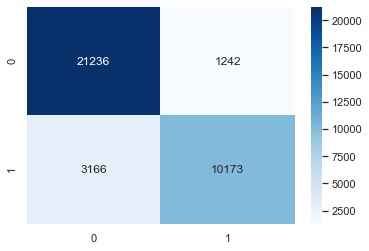

In [305]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')